In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

import seaborn as sns

# visualization
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
data_df = pd.read_csv(r'C:\Users\elill\OneDrive\Desktop\archive\Mall_Customers.csv')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data_df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [5]:
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


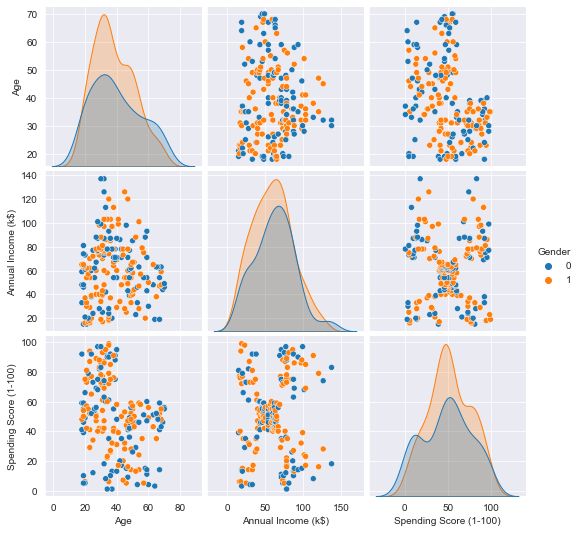

In [7]:
data_df = data_df[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
# numerical_df = data_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# categorical_df = data_df[['Gender']]


dict={'Male': 0, 'Female':1}
data_df['Gender'] = data_df['Gender'].map(dict)



sns.set_style('darkgrid')
sns.pairplot(data_df, hue='Gender')
data_df.describe()

<AxesSubplot:>

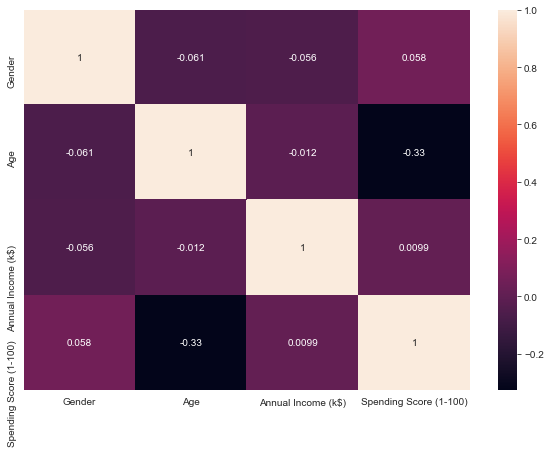

In [8]:
plt.subplots(figsize=(10,7))
sns.heatmap(data_df.corr(), annot=True)

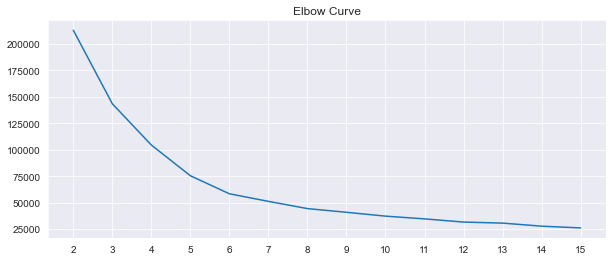

In [9]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_df)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

In [10]:
#K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_df)

KMeans(n_clusters=5)

In [11]:
data_df['Cluster'] = kmeans.labels_

In [12]:
data_df.Cluster.unique()

array([4, 3, 0, 1, 2])

In [13]:
data_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4


C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,0.538462,32.692308,86.538462,82.128205,1.0
std,0.505035,3.728650,16.312485,9.364489,0.0
min,0.000000,27.000000,69.000000,63.000000,1.0
25%,0.000000,30.000000,75.500000,74.500000,1.0
50%,1.000000,32.000000,79.000000,83.000000,1.0
75%,1.000000,35.500000,95.000000,90.000000,1.0
max,1.000000,40.000000,137.000000,97.000000,1.0


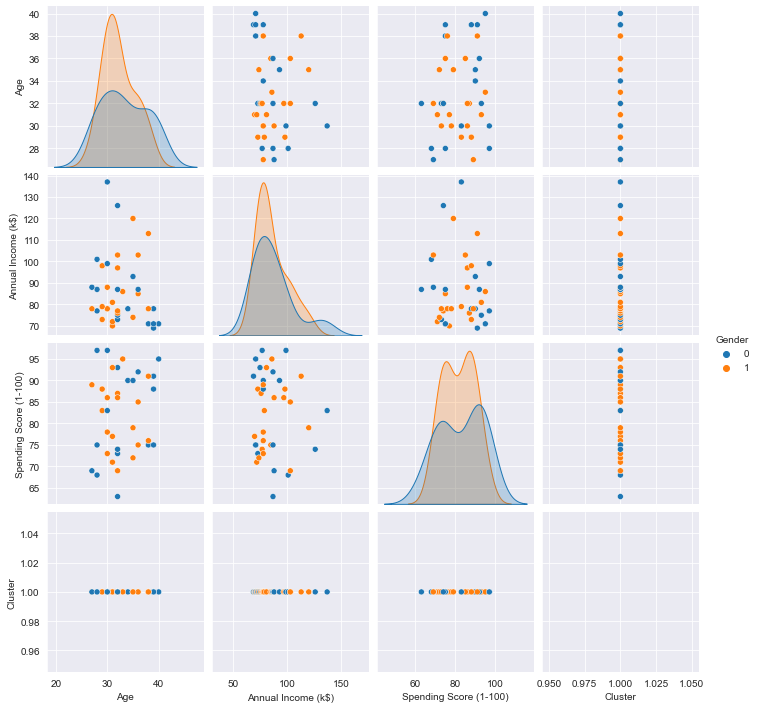

In [14]:
cluster_1 = data_df[data_df['Cluster']==1]
    
sns.set_style('darkgrid')
sns.pairplot(cluster_1, hue='Gender')

cluster_1.groupby('Gender').count()
cluster_1.describe()

C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.000000,79.0
mean,0.582278,43.088608,55.291139,49.569620,0.0
std,0.496335,16.478572,8.710665,6.242295,0.0
min,0.000000,18.000000,40.000000,35.000000,0.0
25%,0.000000,27.000000,48.000000,44.500000,0.0
50%,1.000000,47.000000,54.000000,50.000000,0.0
75%,1.000000,54.500000,62.000000,55.000000,0.0
max,1.000000,70.000000,76.000000,60.000000,0.0


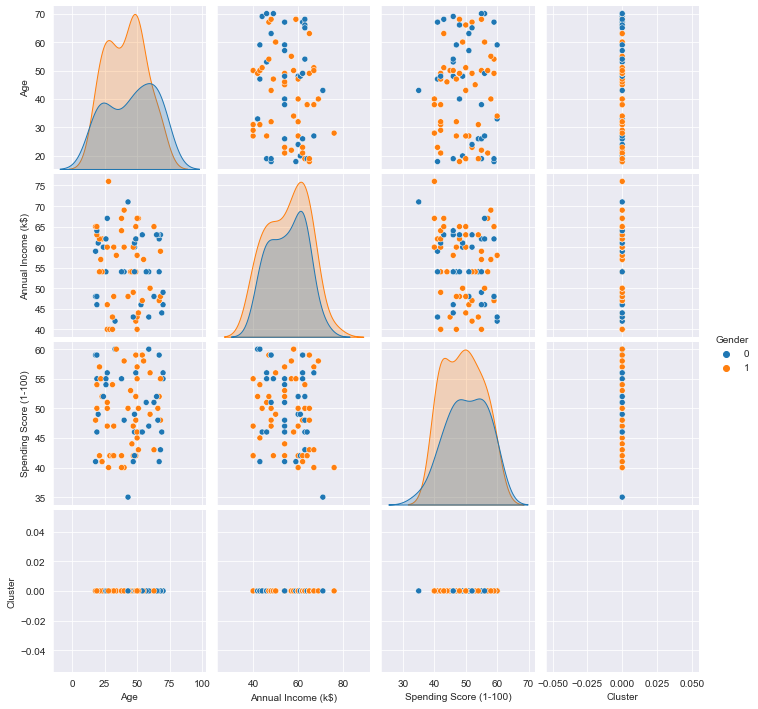

In [15]:
cluster_0 = data_df[data_df['Cluster']==0]
    
sns.set_style('darkgrid')
sns.pairplot(cluster_0, hue='Gender')

cluster_0.groupby('Gender').count()
cluster_0.describe()

C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.472222,40.666667,87.750000,17.583333,2.0
std,0.506309,11.496583,16.387059,10.204691,0.0
min,0.000000,19.000000,70.000000,1.000000,2.0
25%,0.000000,34.000000,77.000000,10.000000,2.0
50%,0.000000,41.500000,83.000000,16.000000,2.0
75%,1.000000,47.250000,97.250000,24.500000,2.0
max,1.000000,59.000000,137.000000,39.000000,2.0


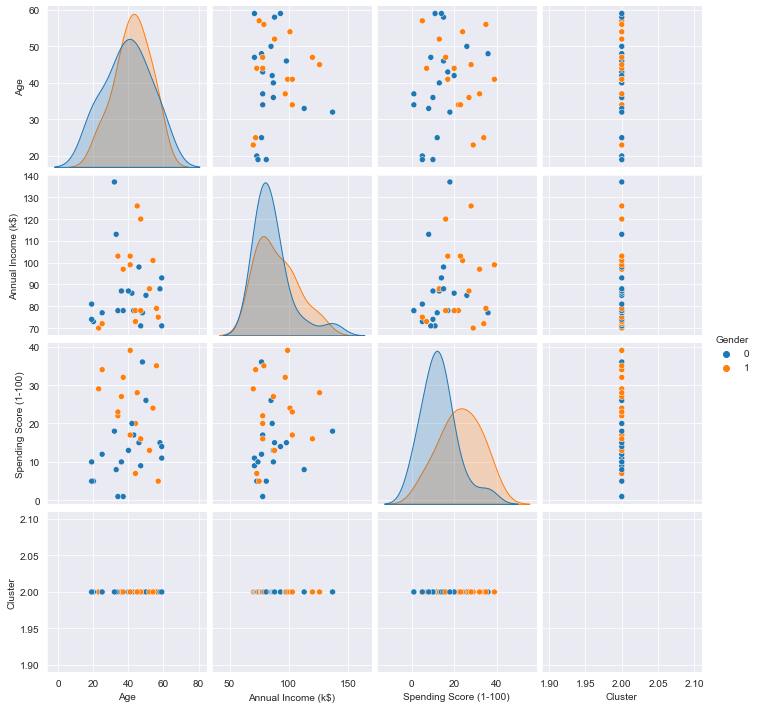

In [16]:
cluster_2 = data_df[data_df['Cluster']==2]
    
sns.set_style('darkgrid')
sns.pairplot(cluster_2, hue='Gender')

cluster_2.groupby('Gender').count()
cluster_2.describe()

C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,0.608696,25.521739,26.304348,78.565217,3.0
std,0.499011,5.273170,7.893811,10.953729,0.0
min,0.000000,18.000000,15.000000,61.000000,3.0
25%,0.000000,21.500000,19.500000,73.000000,3.0
50%,1.000000,24.000000,25.000000,77.000000,3.0
75%,1.000000,30.000000,33.000000,84.500000,3.0
max,1.000000,35.000000,39.000000,99.000000,3.0


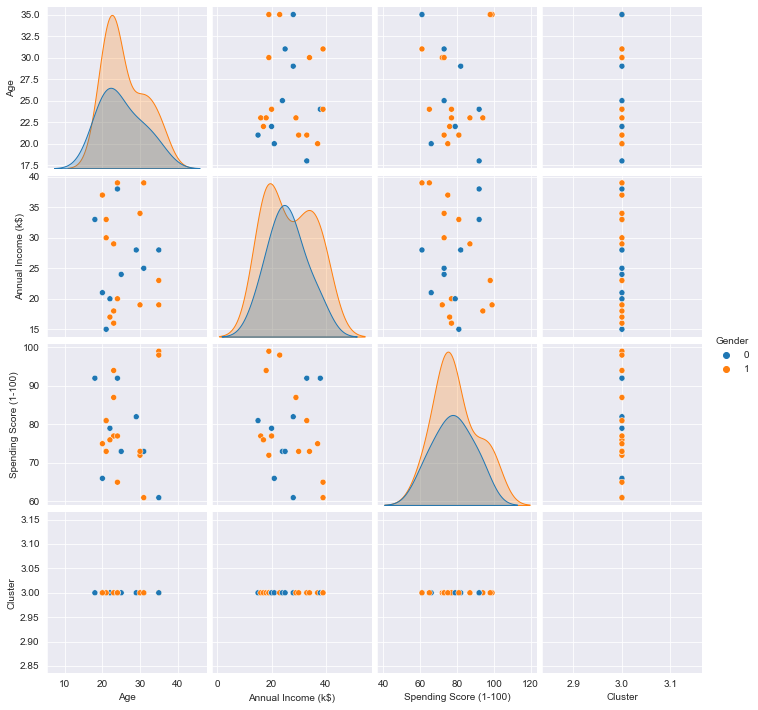

In [17]:
cluster_3 = data_df[data_df['Cluster']==3]
    
sns.set_style('darkgrid')
sns.pairplot(cluster_3, hue='Gender')

cluster_3.groupby('Gender').count()
cluster_3.describe()

In [18]:
cluster_3.groupby('Gender').count()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
Gender,,,,
0,9,9,9,9
1,14,14,14,14


C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\elill\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,0.608696,45.217391,26.304348,20.913043,4.0
std,0.499011,13.228607,7.893811,13.017167,0.0
min,0.000000,19.000000,15.000000,3.000000,4.0
25%,0.000000,35.500000,19.500000,9.500000,4.0
50%,1.000000,46.000000,25.000000,17.000000,4.0
75%,1.000000,53.500000,33.000000,33.500000,4.0
max,1.000000,67.000000,39.000000,40.000000,4.0


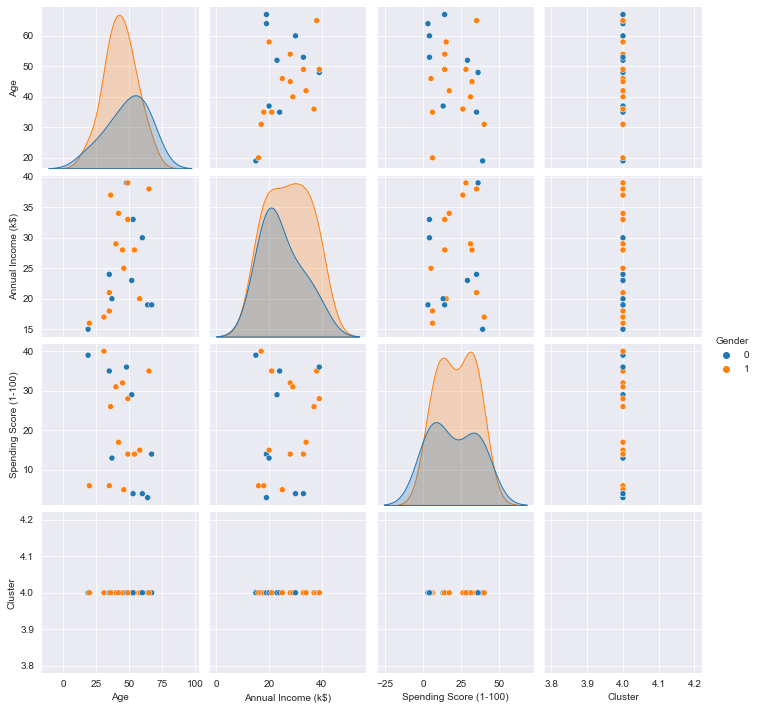

In [19]:
cluster_4 = data_df[data_df['Cluster']==4]
    
sns.set_style('darkgrid')
sns.pairplot(cluster_4, hue='Gender')

cluster_4.groupby('Gender').count()
cluster_4.describe()

In [20]:
cluster_4.groupby('Gender').count()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
Gender,,,,
0,9,9,9,9
1,14,14,14,14


In [21]:
data_df.groupby(['Gender','Cluster']).count()

Age  Annual Income (k$)  Spending Score (1-100)
Gender Cluster                                                 
0      0         33                  33                      33
       1         18                  18                      18
       2         19                  19                      19
       3          9                   9                       9
       4          9                   9                       9
1      0         46                  46                      46
       1         21                  21                      21
       2         17                  17                      17
       3         14                  14                      14
       4         14                  14                      14

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000,1.360000
std,0.497633,13.969007,26.264721,25.823522,1.396478
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,0.000000
50%,1.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,4.000000


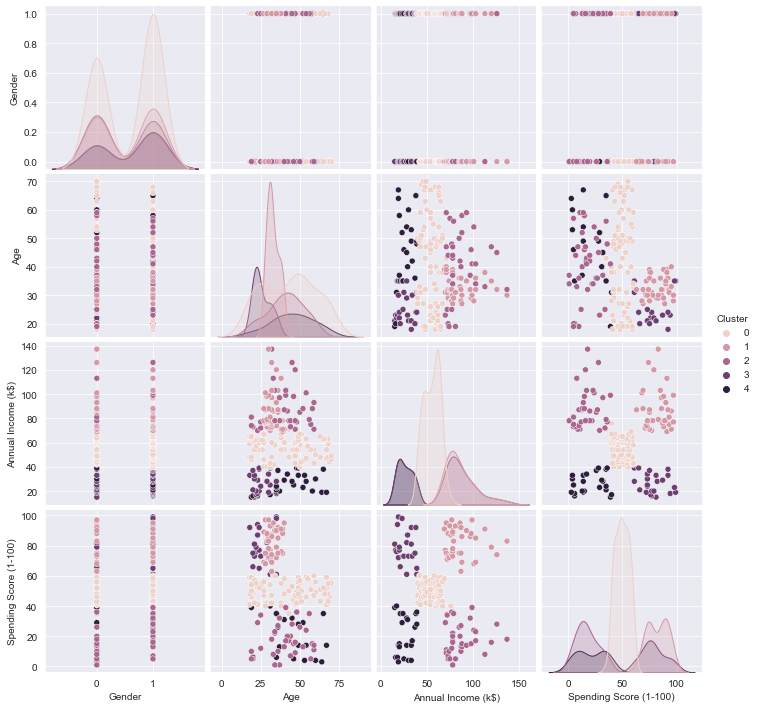

In [22]:
data_df.describe()

sns.set_style('darkgrid')
sns.pairplot(data_df, hue='Cluster')

data_df.groupby('Gender').count()
data_df.describe()

In [23]:
data_df.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.582278,43.088608,55.291139,49.569620
1,0.538462,32.692308,86.538462,82.128205
2,0.472222,40.666667,87.750000,17.583333
3,0.608696,25.521739,26.304348,78.565217
4,0.608696,45.217391,26.304348,20.913043


Cluster Insight:

Cluster 4 has middle-aged customers, with higher income and lower spending score. Also this clusters consists of slightly more males than female.

Final Insight:

Cluster 0 consists of more Females. This cluster has a higher average age relative to the other clusters and the annual income and spending score are both very moderate in comparison to the other clusters.

Cluster 1 consists of younger customers with slightly more females. The annual income and spending score are very high for this cluster.

Cluster 2 consists of younger customers with lower income and higher spending score. Younger customers have a wider range of spending score while as age increases the spending score increases as well. Lower income customers have higher spending score compared to those with higher income. This cluster has much more females.

Cluster 3 consists of customers with a wide age range and has the highest average age of customers. This cluster has lower income and lower spending score with the amount of customers favouring females heavily. 

Cluster 4 has middle-aged customers, with the highest income and lowest spending score. Also this is the only cluster with more males than females.

As age increases, spending score decreases. 